# Assignment 1: Predict diabetes using Perceptron

In [1]:
from sklearn.datasets import load_svmlight_file
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

## Base model design

### Load and process data

In [2]:
X_sparse, y = load_svmlight_file('diabetes_scale')
X = X_sparse.toarray()
df = pd.DataFrame(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
df.describe()

,0,1,2,3,4,5,6,7
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,-0.547641,0.215020,0.132877,-0.585122,-0.811349,-0.046421,-0.663641,-0.591971
std,0.396421,0.321333,0.317308,0.322267,0.272444,0.234997,0.282945,0.392008
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,-0.882353,-0.005025,0.016393,-1.000000,-1.000000,-0.186289,-0.858455,-0.900000
50%,-0.647059,0.175879,0.180328,-0.535354,-0.927896,-0.046200,-0.748506,-0.733333
75%,-0.294118,0.409547,0.311475,-0.353535,-0.699173,0.090909,-0.531811,-0.333333
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Implement and test base model

In [3]:
class Perceptron:
    def __init__(self, lr, n_iter):
        self.lr = lr
        self.n_iter = n_iter
        self.weights = np.zeros(X.shape[1] + 1)

    def activation_function(self, x):
        return np.where(x >= 0, 1, -1)

    def fit(self, X, y):
        for _ in range(self.n_iter):
            for idx, xi in enumerate(X):
                update = self.lr * (y[idx] - self.predict(xi))
                self.weights[1:] += update * xi
                self.weights[0] += update
        return self

    def predict(self, X):
        output = np.dot(X, self.weights[1:]) + self.weights[0]
        return self.activation_function(output)

In [4]:
perceptron = Perceptron(lr=0.01, n_iter=800)
perceptron.fit(X_train, y_train)
y_pred = perceptron.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.7857142857142857

### Discuss the base model

In [5]:
# Test and see how much influnce lr and n_iter have on model performance
lr = [0.01, 0.001, 0.0001, 0.00001]
n_iter = [500, 1000, 2000]
for learningrate in lr:
    for num in n_iter:
        perceptron = Perceptron(learningrate, num)
        perceptron.fit(X_train, y_train)
        y_pred = perceptron.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        print(f'\n lr: {learningrate}, n_iter: {num}, acc: {accuracy}')


 lr: 0.01, n_iter: 500, acc: 0.7337662337662337

 lr: 0.01, n_iter: 1000, acc: 0.7727272727272727

 lr: 0.01, n_iter: 2000, acc: 0.7207792207792207

 lr: 0.001, n_iter: 500, acc: 0.7337662337662337

 lr: 0.001, n_iter: 1000, acc: 0.7727272727272727

 lr: 0.001, n_iter: 2000, acc: 0.7207792207792207

 lr: 0.0001, n_iter: 500, acc: 0.7337662337662337

 lr: 0.0001, n_iter: 1000, acc: 0.7727272727272727

 lr: 0.0001, n_iter: 2000, acc: 0.7207792207792207

 lr: 1e-05, n_iter: 500, acc: 0.7337662337662337

 lr: 1e-05, n_iter: 1000, acc: 0.7727272727272727

 lr: 1e-05, n_iter: 2000, acc: 0.7207792207792207


In [6]:
def acc_against_iter(iter, accuracy_history):
    plt.plot(range(1, iter + 1), accuracy_history)
    plt.xlabel('Iterations')
    plt.ylabel('Accuracy')
    plt.title('Accuracy vs. Iterations')
    plt.legend()
    plt.grid(True)
    plt.show()

In [7]:
class Perceptron_analyse(Perceptron):
    def __init__(self, lr, n_iter):
        super().__init__(lr, n_iter)

    def fit(self, X, y):
        self.accuracy_history = []
        for _ in range(self.n_iter):
            for idx, xi in enumerate(X):
                update = self.lr * (y[idx] - self.predict(xi))
                self.weights[1:] += update * xi
                self.weights[0] += update

            y_pred = self.predict(X_test)
            accuracy = accuracy_score(y_test, y_pred)
            self.accuracy_history.append(accuracy)  # Store the accuracy
        return self.accuracy_history

C:\Users\August.KT.Shen\AppData\Local\Temp\ipykernel_122140\2313573138.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


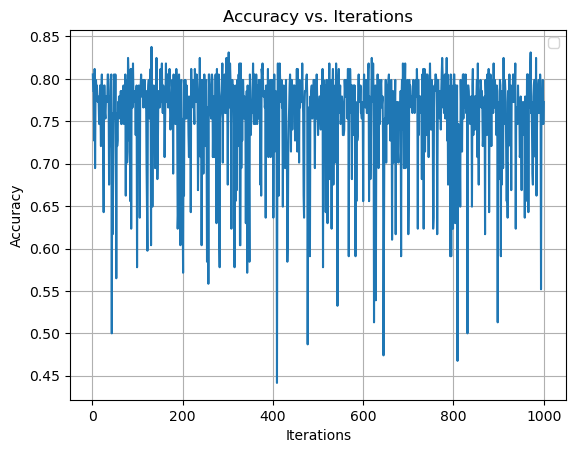

In [8]:
learning_rate = 0.001
iterations = 1000
perceptron_analyse = Perceptron_analyse(lr=learning_rate, n_iter=iterations)
accuracy_history = perceptron_analyse.fit(X_train, y_train)

acc_against_iter(iterations, accuracy_history)

## Improve the model

### Stay in the single layer concept

#### Apply learning rate decay

In [9]:
class PerceptronLRDecay(Perceptron):
    def __init__(self, lr, n_iter):
        super().__init__(lr, n_iter)

    def fit(self, X, y):
        self.accuracy_history = []
        for _ in range(self.n_iter):
            for idx, xi in enumerate(X):
                update = self.lr * (y[idx] - self.predict(xi))
                self.weights[1:] += update * xi
                self.weights[0] += update
            
            # Learning rate decay
            self.lr *= 0.99 

            y_pred = self.predict(X_test)
            accuracy = accuracy_score(y_test, y_pred)
            self.accuracy_history.append(accuracy)
        return self.accuracy_history

C:\Users\August.KT.Shen\AppData\Local\Temp\ipykernel_122140\2313573138.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


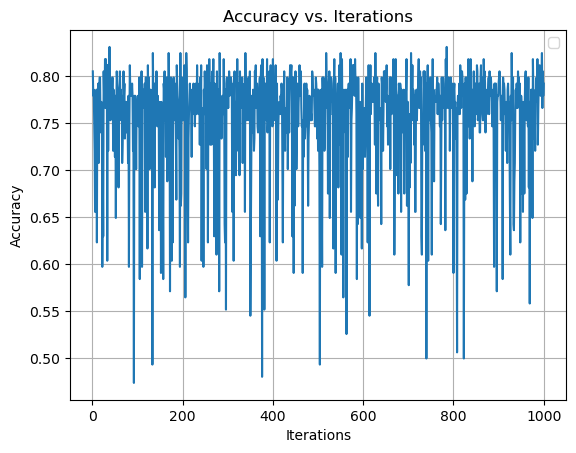

In [10]:
learning_rate = 0.001
iterations = 1000
perceptron_lrdecay = PerceptronLRDecay(lr=learning_rate, n_iter=iterations)
accuracy_history = perceptron_lrdecay.fit(X_train, y_train)

acc_against_iter(iterations, accuracy_history)

#### Apply L2 Regularization

In [11]:
class PerceptronL2Regularization(Perceptron):
    def __init__(self, lr, n_iter, reg):
        super().__init__(lr, n_iter)
        self.reg = reg

    def fit(self, X, y):
        self.accuracy_history = []
        for _ in range(self.n_iter):
            for idx, xi in enumerate(X):
                update = self.lr * (y[idx] - self.predict(xi))
                # L2 penalty
                self.weights[1:] += update * xi - self.reg * self.weights[1:]
                self.weights[0] += update

            y_pred = self.predict(X_test)
            accuracy = accuracy_score(y_test, y_pred)
            self.accuracy_history.append(accuracy)
        return self.accuracy_history

C:\Users\August.KT.Shen\AppData\Local\Temp\ipykernel_122140\2313573138.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


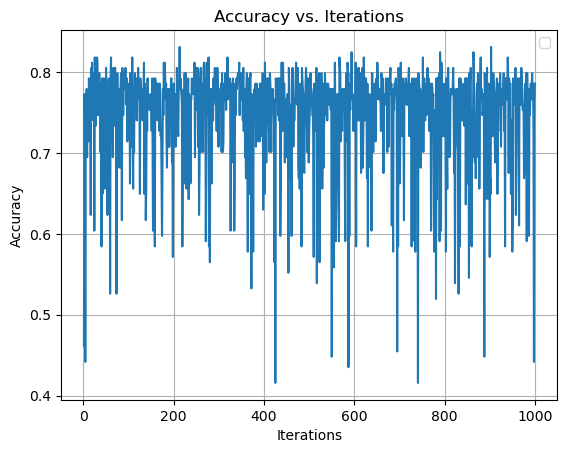

In [12]:
learning_rate = 0.001
iterations = 1000
perceptron_l2reg= PerceptronL2Regularization(lr=learning_rate, n_iter=iterations, reg = 0.001)
accuracy_history = perceptron_l2reg.fit(X_train, y_train)

acc_against_iter(iterations, accuracy_history)

#### Apply Standardization before training

In [13]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

##### Base model

In [14]:
class PerceptronScaled(Perceptron):
    def __init__(self, lr, n_iter):
        super().__init__(lr, n_iter)

    def fit(self, X, y):
        self.accuracy_history = []
        for _ in range(self.n_iter):
            for idx, xi in enumerate(X):
                update = self.lr * (y[idx] - self.predict(xi))
                self.weights[1:] += update * xi
                self.weights[0] += update

            y_pred = self.predict(X_test_scaled)
            accuracy = accuracy_score(y_test, y_pred)
            self.accuracy_history.append(accuracy)
        return self.accuracy_history

C:\Users\August.KT.Shen\AppData\Local\Temp\ipykernel_122140\2313573138.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


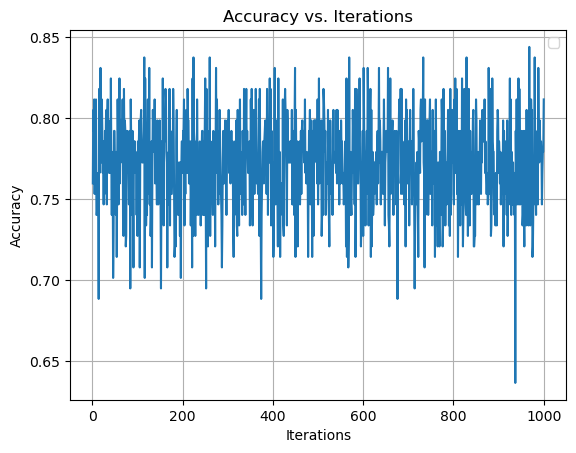

In [15]:
learning_rate = 0.001
iterations = 1000
perceptron_scaled= PerceptronScaled(lr=learning_rate, n_iter=iterations)
accuracy_history = perceptron_scaled.fit(X_train_scaled, y_train)

acc_against_iter(iterations, accuracy_history)

##### Learning rate decay

In [16]:
class PerceptronLRDecayScaled(Perceptron):
    def __init__(self, lr, n_iter):
        super().__init__(lr, n_iter)

    def fit(self, X, y):
        self.accuracy_history = []
        for _ in range(self.n_iter):
            for idx, xi in enumerate(X):
                update = self.lr * (y[idx] - self.predict(xi))
                self.weights[1:] += update * xi
                self.weights[0] += update
            
            # Learning rate decay
            self.lr *= 0.99 

            y_pred = self.predict(X_test_scaled)
            accuracy = accuracy_score(y_test, y_pred)
            self.accuracy_history.append(accuracy)
        return self.accuracy_history

C:\Users\August.KT.Shen\AppData\Local\Temp\ipykernel_122140\2313573138.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


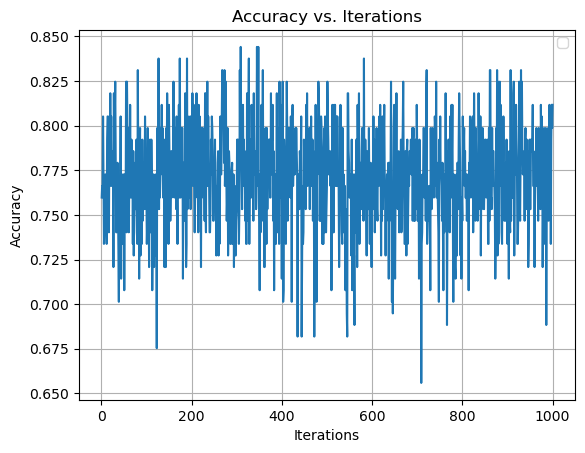

In [17]:
learning_rate = 0.001
iterations = 1000
perceptron_lrdecayscaled = PerceptronLRDecayScaled(lr=learning_rate, n_iter=iterations)
accuracy_history = perceptron_lrdecayscaled.fit(X_train_scaled, y_train)

acc_against_iter(iterations, accuracy_history)

##### L2 regularization

In [18]:
class PerceptronL2RegularizationScaled(Perceptron):
    def __init__(self, lr, n_iter, reg):
        super().__init__(lr, n_iter)
        self.reg = reg

    def fit(self, X, y):
        self.accuracy_history = []
        for _ in range(self.n_iter):
            for idx, xi in enumerate(X):
                update = self.lr * (y[idx] - self.predict(xi))
                # L2 penalty
                self.weights[1:] += update * xi - self.reg * self.weights[1:]
                self.weights[0] += update

            y_pred = self.predict(X_test_scaled)
            accuracy = accuracy_score(y_test, y_pred)
            self.accuracy_history.append(accuracy)
        return self.accuracy_history

C:\Users\August.KT.Shen\AppData\Local\Temp\ipykernel_122140\2313573138.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


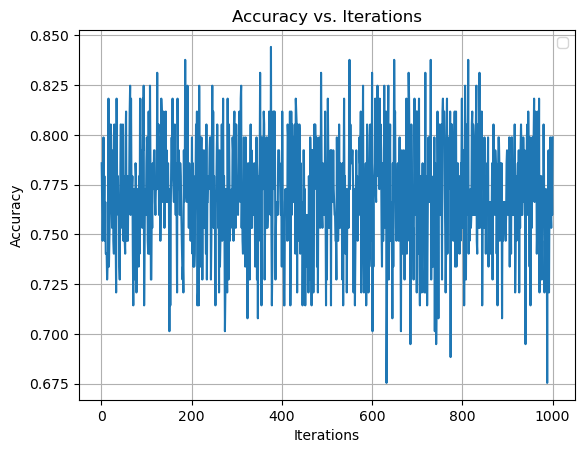

In [19]:
learning_rate = 0.001
iterations = 1000
perceptron_l2regscaled= PerceptronL2RegularizationScaled(lr=learning_rate, n_iter=iterations, reg = 0.001)
accuracy_history = perceptron_l2regscaled.fit(X_train_scaled, y_train)

acc_against_iter(iterations, accuracy_history)

### Outside the concept (MLP)

In [20]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {
    'hidden_layer_sizes': [(4,), (8,)],
    'activation': ['tanh'],
    'learning_rate_init': [0.01, 0.001, 0.0001],
    'max_iter': [1500, 1750, 2000, 2250,2500]
}

mlp = MLPClassifier(random_state=42)
grid_search = GridSearchCV(estimator=mlp, param_grid=param_grid, scoring='accuracy')
grid_search.fit(X_train, y_train)
print(f"Best parameters: {grid_search.best_params_}")

y_test_pred = grid_search.best_estimator_.predict(X_test)

# Evaluate test accuracy
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f'Test Accuracy: {test_accuracy}')

Best parameters: {'activation': 'tanh', 'hidden_layer_sizes': (4,), 'learning_rate_init': 0.001, 'max_iter': 1500}
Test Accuracy: 0.7597402597402597


In [21]:
param_grid = {
    'hidden_layer_sizes': [(4,), (8,)],
    'activation': ['tanh'],
    'learning_rate_init': [0.01, 0.001, 0.0001],
    'max_iter': [1750, 2000, 2250,2500]
}

mlp = MLPClassifier(random_state=42)
grid_search = GridSearchCV(estimator=mlp, param_grid=param_grid, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)
print(f"Best parameters: {grid_search.best_params_}")

y_test_pred = grid_search.best_estimator_.predict(X_test_scaled)

# Evaluate test accuracy
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f'Test Accuracy: {test_accuracy}')

Best parameters: {'activation': 'tanh', 'hidden_layer_sizes': (8,), 'learning_rate_init': 0.001, 'max_iter': 1750}
Test Accuracy: 0.7467532467532467
